In [33]:
from extract import extract
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [34]:
# get data here
data = extract()
print(data)

{'../results/experiment_2': {'node-count-4': {'round-3': {'data-read': '4031', 'start-tc': '12352', 'finish': '31785', 'cpu-master': ['0.0', '162', '163', '244', '210', '191', '212', '222', '229', '220', '212', '203', '196', '189', '184', '181', '184', '183', '182', '172', '173', '173', '173', '173', '173', '172', '173', '173', '174', '174', '174', '173', '173', '173', '173', '170', '165', '161', '157', '153', '149', '146', '142', '139', '136'], 'cpu-worker': [['0.0', '158', '169', '176', '136', '112', '96.3', '84.2', '76.6', '73.4', '75.4', '73.7', '72.6', '126', '258', '276', '277', '274', '271', '268', '266', '264', '279', '304', '305', '307', '310', '340', '378', '398', '427', '425', '436', '470', '498', '506', '520', '552', '576', '583', '580', '567', '554', '542', '530', '519', '508', '497', '487', '478'], ['0.0', '166', '166', '175', '135', '111', '96.3', '84.8', '89.7', '85.6', '82.3', '79.6', '77.0', '88.9', '95.2', '105', '105', '105', '106', '106', '109', '163', '175', '194'

In [35]:
# the number of nodes that run worker is the key of the dict
max_worker_nodes = len(data['../results/experiment_2'].keys())

# since we tested 1, 2, 3... nodes
X = np.arange(max_worker_nodes) + 1
# 
finished_all =[]
finished_mean = []
finished_min = []
finished_max = []
# 
#iterate over all worker_nodes
for experiement_number in range(1, max_worker_nodes+1):
    experiment_key = 'node-count-' + str(experiement_number)
    experiment = data['../results/experiment_2'][experiment_key]
    round_finished = []
    number_of_rounds = len(experiment.keys())
    for round_number in range(1,number_of_rounds+1):
        round_key = 'round-'+ str(round_number)
        round = experiment[round_key]
        finished = int(round['finish'])
        round_finished.append(finished)

    finished_all.append(round_finished)
    finished_min.append(min(round_finished))
    finished_max.append(max(round_finished))
    finished_mean.append(np.array(round_finished).mean())



In [36]:
def linear_scaling_plot(Y, save_to, x_min, x_max, y_min, y_max, title=None):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(X, Y, '-o', color='tab:blue')
    
    ax.set_xlabel("Number of Nodes")
    ax.set_ylabel("Time in ms")
    ax.yaxis.grid()
    
    # set the limits
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    
    if title:
        ax.set_title(title)
    
    # display the plot
    plt.show()
    fig.savefig(save_to)

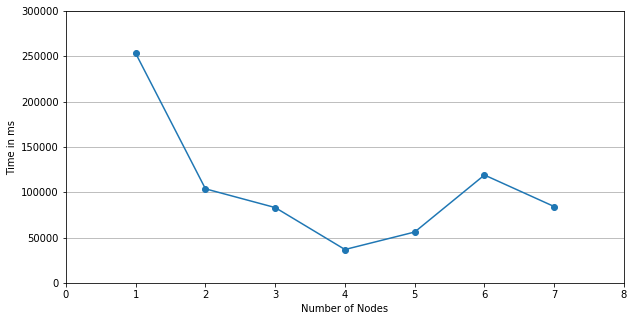

In [39]:
# plot MEAN data
Y = np.array(finished_mean)
linear_scaling_plot(Y, 'linear-scale-mean.pdf', 0, 8, 0, 300000)

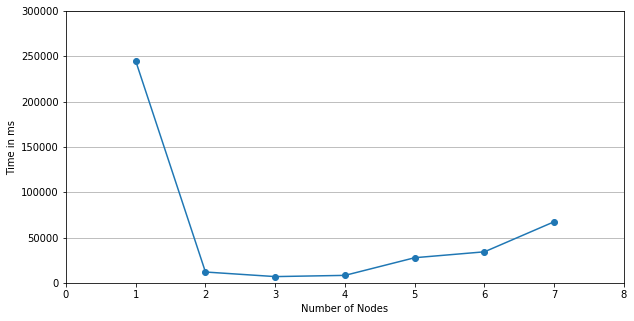

In [41]:
# plot MIN data
Y = np.array(finished_min)
linear_scaling_plot(Y, 'linear-scale-min.pdf', 0, 8, 0, 300000)

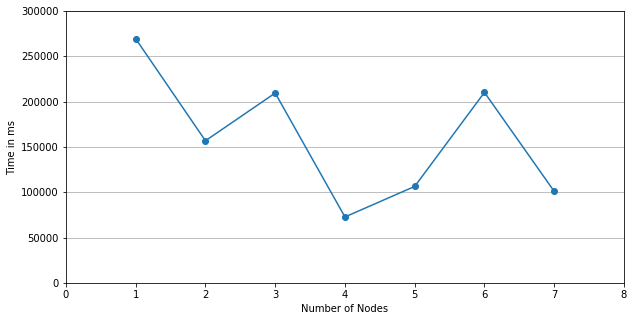

In [42]:
# plot MAX data
Y = np.array(finished_max)
linear_scaling_plot(Y, 'linear-scale-max.pdf', 0, 8, 0, 300000)